## Trajectory of JWST

In [210]:
%matplotlib inline

In [3]:
from astroquery.jplhorizons import Horizons

In [4]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u

In [5]:
import matplotlib.pyplot as plt

In [6]:
from matplotlib import dates

In [7]:
import matplotlib

In [8]:
import numpy as np

In [9]:
dwl = EarthLocation(lat="52d48m43.27", lon="6d23m46.21", height="25m")
dwl_jpl = {'lat': dwl.lat.deg, 'lon': dwl.lon.deg, 'elevation': dwl.height.to(u.m).value}

In [216]:
epochs = Time("2021-12-26T00:00") + np.linspace(17, 28, 44, endpoint=False)*u.hour

In [218]:
ephem_jwst = Horizons(id='JWST', location=dwl_jpl,
                      epochs=list(epochs.jd), id_type='majorbody').ephemerides()
## Use location '015' (Utrecht) for vectors since it does not accept Dwingeloo
vectors_jwst = Horizons(id='jwst', location='015', epochs=list(epochs.jd), id_type='majorbody').vectors()

In [219]:
skycoord_jwst = SkyCoord(ra=ephem_jwst['RA'], dec=ephem_jwst['DEC'])

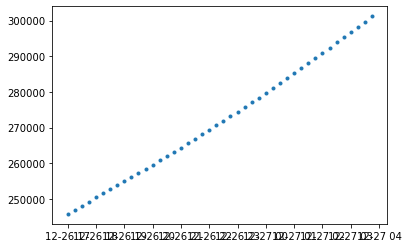

In [220]:
plt.plot(Time(ephem_jwst['datetime_jd'], format='jd').datetime, vectors_jwst['range'].to(u.km), '.');

In [221]:
# https://nova.astrometry.net/user_images/5479042#annotated

In [222]:
!wget https://nova.astrometry.net/new_fits_file/6045856

In [223]:
from astropy.io import fits
from astropy.wcs import WCS

In [224]:
hdu = fits.open("6045856")[0]

In [225]:
wcs = WCS(hdu.header, naxis=2)

In [226]:
from ipywidgets import interact

In [234]:
@interact(i=(0,len(skycoord_jwst)-1))
def make_plot(i):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection=wcs)
    ax.imshow(hdu.data[0], cmap='gray')
    ax.invert_yaxis()
    ax.scatter(skycoord_jwst[i].ra, skycoord_jwst[i].dec,
               transform=ax.get_transform("world"), marker="o", color="r", facecolors="None");
    ax.set_title(Time(ephem_jwst['datetime_jd'], format='jd').iso[i][:19] + "UTC")
    ax.set_xlim(1100, 2200)
    ax.set_ylim(1550, 450)
    ax.set_xlabel("Right ascension")
    ax.set_ylabel("Declination")
    return fig

interactive(children=(IntSlider(value=21, description='i', max=43), Output()), _dom_classes=('widget-interact'…

In [235]:
for i in range(len(skycoord_jwst)):
    fig = make_plot(i)
    fig.savefig(f"jwst_frame{i:02d}.png", facecolor="white", bbox_inches="tight")
    plt.close("all")

```
mogrify -crop 100%x100%+0-1 jwst*.png
ffmpeg -framerate 1 -pattern_type glob -i 'jwst*.png' -c:v libx264 -r 30 -pix_fmt yuv420p out.mp4
```